<a href="https://colab.research.google.com/github/keerthireddy-28/GenerativeAI/blob/main/2303A52263_Week7_Ass7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

df = pd.read_csv('/content/Housing (1).csv')


print("Columns in dataset:", df.columns)
print(df.head())


df.columns = df.columns.str.strip()

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


X = df.drop(columns='price')
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1))


model.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))


model.save('house_price_prediction_model.h5')


test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error (MAE): {test_mae}")

y_pred = model.predict(X_test)

print("Predictions:", y_pred[:5])
print("Actual values:", y_test.head())



Columns in dataset: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3     

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 25139680903168.0000 - mae: 4688235.5000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 25206022209536.0000 - mae: 4687258.5000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 24259871113216.0000 - mae: 4627481.5000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25366097821696.0000 - mae: 4735756.0000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25248145604608.0000 - mae: 4725689.5000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25914410795008.0000 - mae: 4745064.0000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25189293228032.0000 - mae: 470

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28410740998144.0000 - mae: 4812818.0000 
Test Mean Absolute Error (MAE): 5007536.5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predictions: [[ 0.1938039 ]
 [ 0.4564601 ]
 [-0.01640549]
 [ 0.1899986 ]
 [ 0.00982152]]
Actual values: 316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
Name: price, dtype: int64


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


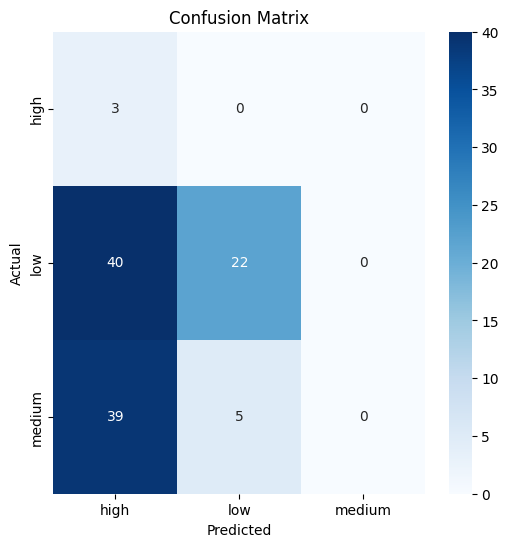

Classification Report:
              precision    recall  f1-score   support

        high       0.04      1.00      0.07         3
         low       0.81      0.35      0.49        62
      medium       0.00      0.00      0.00        44

    accuracy                           0.23       109
   macro avg       0.28      0.45      0.19       109
weighted avg       0.46      0.23      0.28       109



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the model is making predictions
y_pred_prob = model.predict(X_test)  # Predict probabilities

# Convert the predicted probabilities to the class labels (0, 1, 2)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the max probability for each sample

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [26]:
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import StandardScaler

model = load_model('/content/house_price_prediction_model.h5')


new_data = np.array([[7420, 4, 2, 3, 1, 0, 0, 0, 1, 0, 1, 1, 1]])


scaler = StandardScaler()


new_data_scaled = scaler.fit_transform(new_data)


predictions = model.predict(new_data_scaled)


predicted_class = np.argmax(predictions, axis=1)


label_encoder = LabelEncoder()
label_encoder.fit(['low', 'medium', 'high'])
predicted_category = label_encoder.inverse_transform(predicted_class)


print(f"Predicted price category: {predicted_category[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted price category: high
